<a href="https://colab.research.google.com/github/NeshPk/NeshPk/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 【Problem 1 】 Determine the initial value of the center point

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # クラスタ中心

    def _init_centroids(self, X):
        """
        クラスタ中心を初期化する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        Returns
        -------
        centroids : 次の形のndarray, shape (n_clusters, n_features)
            初期化されたクラスタ中心
        """
        rng = np.random.RandomState(0) # 乱数シードを固定（再現性のため）
        random_indices = rng.permutation(X.shape[0])[:self.n_clusters]
        centroids = X[random_indices]
        return centroids

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        best_centroids = None
        min_inertia = float('inf')

        for _ in range(self.n_init):
            centroids = self._init_centroids(X)

            if self.verbose:
                print("Initial centroids:\n", centroids)

            # ... (rest of the fit method will go here) ...

        self.centroids = best_centroids

        if self.verbose:
            print("Optimal centroids found:\n", self.centroids)

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

# Artificial data set for clustering
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Example of initializing the ScratchKMeans class and the initial centroids
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=1e-4, verbose=True)
initial_centroids = kmeans._init_centroids(X)
print("First set of initial centroids:\n", initial_centroids)

First set of initial centroids:
 [[-0.565433    3.65813966]
 [ 1.60161834  0.92363636]
 [ 1.35678894  4.36462484]
 [-1.26041884  7.46644456]]


##### 【Problem 2 】 Creating a function that requires SSE

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

class ScratchKMeans():
    """
    K-means implementation from scratch.

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      Number of times to perform k-means with different centroid seeds.
    max_iter : int
      Maximum number of iterations for a single k-means run.
    tol : float
      Tolerance with regard to the difference between the new and old centroid positions to declare convergence.
    verbose : bool
      Whether to output the learning process.
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # Cluster centers
        self.labels_ = None # Cluster labels for each data point

    def _init_centroids(self, X):
        """
        Initialize cluster centers.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features.

        Returns
        -------
        centroids : ndarray, shape (n_clusters, n_features)
            Initialized cluster centers.
        """
        rng = np.random.RandomState(0) # Fix random seed for reproducibility
        random_indices = rng.permutation(X.shape[0])[:self.n_clusters]
        centroids = X[random_indices]
        return centroids

    def _calculate_sse(self, X, labels, centroids):
        """
        Calculate the Sum of Squared Errors (SSE).

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features.
        labels : ndarray, shape (n_samples,)
            Cluster labels for each data point.
        centroids : ndarray, shape (n_clusters, n_features)
            Cluster centers.

        Returns
        -------
        sse : float
            Sum of Squared Errors.
        """
        sse = 0
        for i in range(X.shape[0]):
            centroid = centroids[labels[i]]
            sse += np.sum((X[i] - centroid)**2)
        return sse

    def fit(self, X):
        """
        Compute k-means clustering.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features.
        """
        best_centroids = None
        min_sse = float('inf')
        best_labels = None

        for _ in range(self.n_init):
            centroids = self._init_centroids(X)

            if self.verbose:
                print("Initial centroids:\n", centroids)

            for iter_ in range(self.max_iter):
                old_centroids = centroids.copy()

                # Problem 3: Cluster assignment
                labels = self._assign_clusters(X, centroids)

                # Problem 4: Update centroids
                centroids = self._update_centroids(X, labels)

                if self.verbose:
                    print(f"Iteration {iter_+1}, Centroids:\n", centroids)

                # Check for convergence
                if np.allclose(old_centroids, centroids, rtol=0, atol=self.tol):
                    if self.verbose:
                        print(f"Converged at iteration {iter_+1}")
                    break

            current_sse = self._calculate_sse(X, labels, centroids)
            if current_sse < min_sse:
                min_sse = current_sse
                best_centroids = centroids
                best_labels = labels

        self.centroids = best_centroids
        self.labels_ = best_labels

        if self.verbose:
            print("Optimal centroids found:\n", self.centroids)
            print("Minimum SSE:", min_sse)

    def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            New data to predict.

        Returns
        -------
        labels : ndarray, shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        if self.centroids is None:
            raise Exception("Model not fitted yet.")
        return self._assign_clusters(X, self.centroids)

    def _assign_clusters(self, X, centroids):
        """
        Assign each data point to the nearest centroid.
        """
        distances = np.sqrt(((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """
        Update centroids by taking the mean of data points assigned to each cluster.
        """
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        # Handle cases where a cluster might have no assigned points
        for k in range(self.n_clusters):
            if np.sum(labels == k) == 0:
                # Re-initialize the centroid randomly (a common strategy)
                rng = np.random.RandomState()
                random_index = rng.randint(X.shape[0])
                new_centroids[k] = X[random_index]
        return new_centroids

# Artificial data set for clustering
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Example usage
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=1e-4, verbose=True)
kmeans.fit(X)
print("Predicted labels:\n", kmeans.labels_)
print("Final centroids:\n", kmeans.centroids)

Initial centroids:
 [[-0.565433    3.65813966]
 [ 1.60161834  0.92363636]
 [ 1.35678894  4.36462484]
 [-1.26041884  7.46644456]]
Iteration 1, Centroids:
 [[-1.24587768  3.22980708]
 [ 1.99186903  0.96561071]
 [ 1.06148307  4.39922699]
 [-1.26811733  7.76378266]]
Iteration 2, Centroids:
 [[-1.47935679  3.11716896]
 [ 1.99186903  0.96561071]
 [ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]]
Iteration 3, Centroids:
 [[-1.47935679  3.11716896]
 [ 1.99186903  0.96561071]
 [ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]]
Converged at iteration 3
Initial centroids:
 [[-0.565433    3.65813966]
 [ 1.60161834  0.92363636]
 [ 1.35678894  4.36462484]
 [-1.26041884  7.46644456]]
Iteration 1, Centroids:
 [[-1.24587768  3.22980708]
 [ 1.99186903  0.96561071]
 [ 1.06148307  4.39922699]
 [-1.26811733  7.76378266]]
Iteration 2, Centroids:
 [[-1.47935679  3.11716896]
 [ 1.99186903  0.96561071]
 [ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]]
Iteration 3, Centroids:
 [[-1.47935679  3.11716

##### 【Problem 3 】 Assignment to cluster

In [2]:
def _assign_clusters(self, X, centroids):
        """
        Assign each data point to the nearest centroid.
        """
        distances = np.sqrt(((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        return labels

##### 【Problem 4 】 Move center point

In [3]:
def _update_centroids(self, X, labels):
        """
        Update centroids by taking the mean of data points assigned to each cluster.
        """
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        # Handle cases where a cluster might have no assigned points
        for k in range(self.n_clusters):
            if np.sum(labels == k) == 0:
                # Re-initialize the centroid randomly (a common strategy)
                rng = np.random.RandomState()
                random_index = rng.randint(X.shape[0])
                new_centroids[k] = X[random_index]
        return new_centroids

##### 【Problem 5 】 Repeat

In [4]:
def fit(self, X):
        """
        Compute k-means clustering.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features.
        """
        best_centroids = None
        min_sse = float('inf')
        best_labels = None

        for _ in range(self.n_init):
            centroids = self._init_centroids(X)

            if self.verbose:
                print("Initial centroids:\n", centroids)

            for iter_ in range(self.max_iter):
                old_centroids = centroids.copy()

                # Problem 3: Cluster assignment
                labels = self._assign_clusters(X, centroids)

                # Problem 4: Update centroids
                centroids = self._update_centroids(X, labels)

                if self.verbose:
                    print(f"Iteration {iter_+1}, Centroids:\n", centroids)

                # Check for convergence
                if np.allclose(old_centroids, centroids, rtol=0, atol=self.tol):
                    if self.verbose:
                        print(f"Converged at iteration {iter_+1}")
                    break

            current_sse = self._calculate_sse(X, labels, centroids)
            if current_sse < min_sse:
                min_sse = current_sse
                best_centroids = centroids
                best_labels = labels

        self.centroids = best_centroids
        self.labels_ = best_labels

        if self.verbose:
            print("Optimal centroids found:\n", self.centroids)
            print("Minimum SSE:", min_sse)

##### 【Problem 6 】 Calculated with different initial values

In [5]:
def fit(self, X):
        """
        Compute k-means clustering.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features.
        """
        best_centroids = None
        min_sse = float('inf')
        best_labels = None

        for _ in range(self.n_init):
            centroids = self._init_centroids(X)

            if self.verbose:
                print("Initial centroids:\n", centroids)

            for iter_ in range(self.max_iter):
                old_centroids = centroids.copy()

                # Problem 3: Cluster assignment
                labels = self._assign_clusters(X, centroids)

                # Problem 4: Update centroids
                centroids = self._update_centroids(X, labels)

                if self.verbose:
                    print(f"Iteration {iter_+1}, Centroids:\n", centroids)

                # Check for convergence
                if np.allclose(old_centroids, centroids, rtol=0, atol=self.tol):
                    if self.verbose:
                        print(f"Converged at iteration {iter_+1}")
                    break

            current_sse = self._calculate_sse(X, labels, centroids)
            if current_sse < min_sse:
                min_sse = current_sse
                best_centroids = centroids
                best_labels = labels

        self.centroids = best_centroids
        self.labels_ = best_labels

        if self.verbose:
            print("Optimal centroids found:\n", self.centroids)
            print("Minimum SSE:", min_sse)

##### 【Problem 7 】 Estimated

In [6]:
def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            New data to predict.

        Returns
        -------
        labels : ndarray, shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        if self.centroids is None:
            raise Exception("Model not fitted yet.")
        return self._assign_clusters(X, self.centroids)

def _assign_clusters(self, X, centroids):
    """
    Assign each data point to the nearest centroid.
    """
    distances = np.sqrt(((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

##### 【Problem 8 】 Implementation of Elbow Law

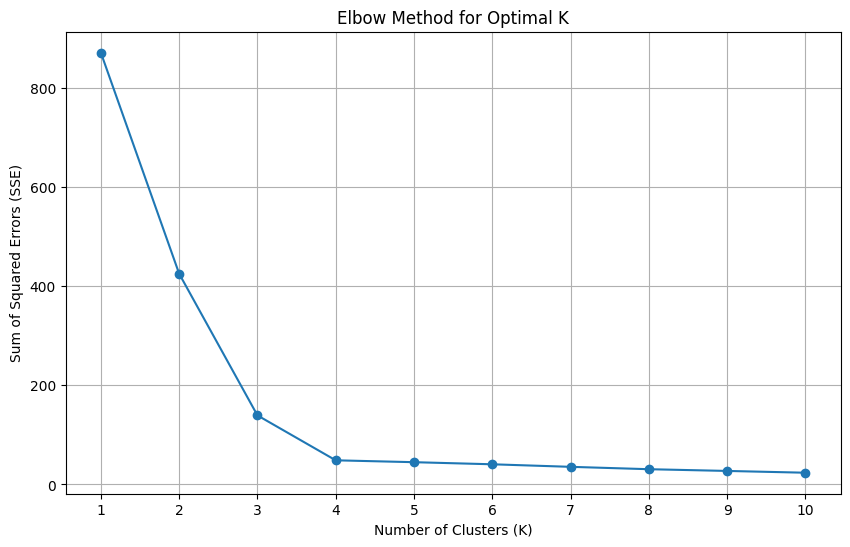

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

class ScratchKMeans():
    """
    K-means implementation from scratch.

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      Number of times to perform k-means with different centroid seeds.
    max_iter : int
      Maximum number of iterations for a single k-means run.
    tol : float
      Tolerance with regard to the difference between the new and old centroid positions to declare convergence.
    verbose : bool
      Whether to output the learning process.
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # Cluster centers
        self.labels_ = None # Cluster labels for each data point
        self.sse_ = None # Sum of Squared Errors for the best fit

    def _init_centroids(self, X):
        """
        Initialize cluster centers.
        ... (rest of the method remains the same) ...
        """
        rng = np.random.RandomState(0)
        random_indices = rng.permutation(X.shape[0])[:self.n_clusters]
        centroids = X[random_indices]
        return centroids

    def _calculate_sse(self, X, labels, centroids):
        """
        Calculate the Sum of Squared Errors (SSE).
        ... (rest of the method remains the same) ...
        """
        sse = 0
        for i in range(X.shape[0]):
            centroid = centroids[labels[i]]
            sse += np.sum((X[i] - centroid)**2)
        return sse

    def fit(self, X):
        """
        Compute k-means clustering.
        ... (rest of the method remains the same, but we store the min_sse) ...
        """
        best_centroids = None
        min_sse = float('inf')
        best_labels = None

        for _ in range(self.n_init):
            centroids = self._init_centroids(X)

            if self.verbose:
                print(f"Initialization {_ + 1}, Initial centroids:\n", centroids)

            for iter_ in range(self.max_iter):
                old_centroids = centroids.copy()
                labels = self._assign_clusters(X, centroids)
                centroids = self._update_centroids(X, labels)

                if self.verbose:
                    print(f"Iteration {iter_+1}, Centroids:\n", centroids)

                if np.allclose(old_centroids, centroids, rtol=0, atol=self.tol):
                    if self.verbose:
                        print(f"Converged at iteration {iter_+1}")
                    break

            current_sse = self._calculate_sse(X, labels, centroids)
            if current_sse < min_sse:
                min_sse = current_sse
                best_centroids = centroids
                best_labels = labels

        self.centroids = best_centroids
        self.labels_ = best_labels
        self.sse_ = min_sse # Store the minimum SSE

        if self.verbose:
            print("Optimal centroids found:\n", self.centroids)
            print("Minimum SSE:", self.sse_)

    def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.
        ... (rest of the method remains the same) ...
        """
        if self.centroids is None:
            raise Exception("Model not fitted yet.")
        return self._assign_clusters(X, self.centroids)

    def _assign_clusters(self, X, centroids):
        """
        Assign each data point to the nearest centroid.
        ... (rest of the method remains the same) ...
        """
        distances = np.sqrt(((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """
        Update centroids by taking the mean of data points assigned to each cluster.
        ... (rest of the method remains the same) ...
        """
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        for k in range(self.n_clusters):
            if np.sum(labels == k) == 0:
                rng = np.random.RandomState()
                random_index = rng.randint(X.shape[0])
                new_centroids[k] = X[random_index]
        return new_centroids

# Artificial data set for clustering
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Code for Elbow Method
sse_values = []
possible_k_values = range(1, 11) # Let's try k from 1 to 10

for k in possible_k_values:
    kmeans = ScratchKMeans(n_clusters=k, n_init=10, max_iter=100, tol=1e-4, verbose=False)
    kmeans.fit(X)
    sse_values.append(kmeans.sse_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

##### 【Problem 9 】 (Advance Challenge) Silhouette Diagram

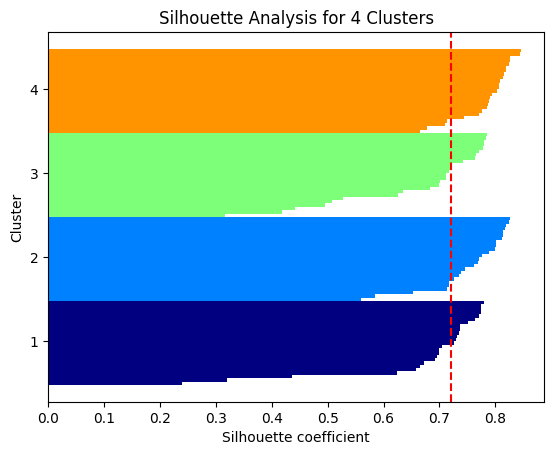

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import pairwise_distances

class ScratchKMeans():
    """
    K-means implementation from scratch.
    ... (rest of the class definition remains the same as before) ...
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels_ = None
        self.sse_ = None

    def _init_centroids(self, X):
        rng = np.random.RandomState(0)
        random_indices = rng.permutation(X.shape[0])[:self.n_clusters]
        centroids = X[random_indices]
        return centroids

    def _calculate_sse(self, X, labels, centroids):
        sse = 0
        for i in range(X.shape[0]):
            centroid = centroids[labels[i]]
            sse += np.sum((X[i] - centroid)**2)
        return sse

    def fit(self, X):
        best_centroids = None
        min_sse = float('inf')
        best_labels = None

        for _ in range(self.n_init):
            centroids = self._init_centroids(X)

            if self.verbose:
                print(f"Initialization {_ + 1}, Initial centroids:\n", centroids)

            for iter_ in range(self.max_iter):
                old_centroids = centroids.copy()
                labels = self._assign_clusters(X, centroids)
                centroids = self._update_centroids(X, labels)

                if self.verbose:
                    print(f"Iteration {iter_+1}, Centroids:\n", centroids)

                if np.allclose(old_centroids, centroids, rtol=0, atol=self.tol):
                    if self.verbose:
                        print(f"Converged at iteration {iter_+1}")
                    break

            current_sse = self._calculate_sse(X, labels, centroids)
            if current_sse < min_sse:
                min_sse = current_sse
                best_centroids = centroids
                best_labels = labels

        self.centroids = best_centroids
        self.labels_ = best_labels
        self.sse_ = min_sse

        if self.verbose:
            print("Optimal centroids found:\n", self.centroids)
            print("Minimum SSE:", self.sse_)

    def predict(self, X):
        if self.centroids is None:
            raise Exception("Model not fitted yet.")
        return self._assign_clusters(X, self.centroids)

    def _assign_clusters(self, X, centroids):
        distances = np.sqrt(((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        for k in range(self.n_clusters):
            if np.sum(labels == k) == 0:
                rng = np.random.RandomState()
                random_index = rng.randint(X.shape[0])
                new_centroids[k] = X[random_index]
        return new_centroids

def calculate_silhouette_coefficients(X, labels):
    """
    Calculates the silhouette coefficient for each data point.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Data points.
    labels : ndarray, shape (n_samples,)
        Cluster labels for each data point.

    Returns
    -------
    silhouette_vals : ndarray, shape (n_samples,)
        Silhouette coefficient for each data point.
    """
    n_samples = X.shape[0]
    silhouette_vals = np.zeros(n_samples)
    unique_labels = np.unique(labels)

    for i in range(n_samples):
        cluster_i = labels[i]
        # Cohesion (a_n): average distance to other points in the same cluster
        points_in_cluster = X[labels == cluster_i]
        if len(points_in_cluster) > 1:
            a_i = np.mean(pairwise_distances(X[[i]], points_in_cluster)[0])
        else:
            a_i = 0  # If only one point in the cluster, cohesion is 0

        # Divergence (b_n): average distance to all points in the nearest other cluster
        min_avg_dist_to_other_clusters = np.inf
        for cluster_j in unique_labels:
            if cluster_j != cluster_i:
                points_in_other_cluster = X[labels == cluster_j]
                if len(points_in_other_cluster) > 0:
                    avg_dist_ij = np.mean(pairwise_distances(X[[i]], points_in_other_cluster)[0])
                    min_avg_dist_to_other_clusters = min(min_avg_dist_to_other_clusters, avg_dist_ij)

        b_i = min_avg_dist_to_other_clusters if min_avg_dist_to_other_clusters != np.inf else 0

        # Silhouette coefficient
        silhouette_vals[i] = (b_i - a_i) / max(b_i, a_i) if max(b_i, a_i) != 0 else 0

    return silhouette_vals

# Artificial data set for clustering
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Number of clusters to test
n_clusters = 4

# Instantiate and fit the KMeans model
kmeans = ScratchKMeans(n_clusters=n_clusters, n_init=10, max_iter=100, tol=1e-4, verbose=False)
kmeans.fit(X)
y_km = kmeans.labels_
cluster_labels = np.unique(y_km)
n_clusters = len(cluster_labels)

# Calculate silhouette coefficients
silhouette_vals = calculate_silhouette_coefficients(X, y_km)
silhouette_avg = np.mean(silhouette_vals)

# Plotting the silhouette diagram
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title(f'Silhouette Analysis for {n_clusters} Clusters')
plt.show()

# You can also run this for different values of n_clusters to compare the silhouette diagrams.

##### 【Problem 10 】 Selection of cluster number k

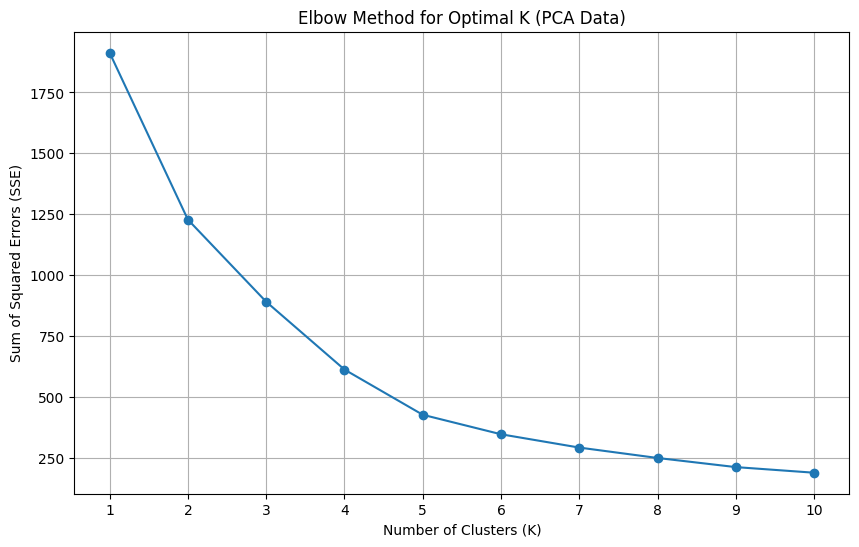

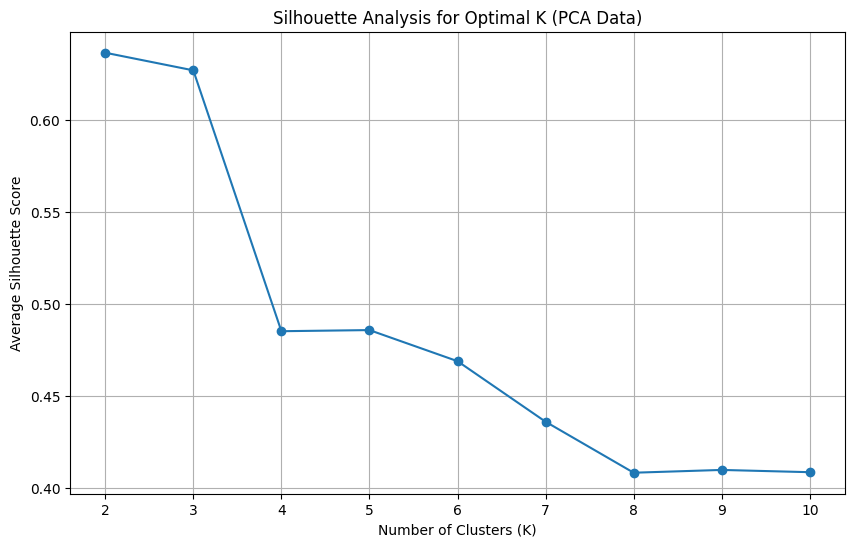

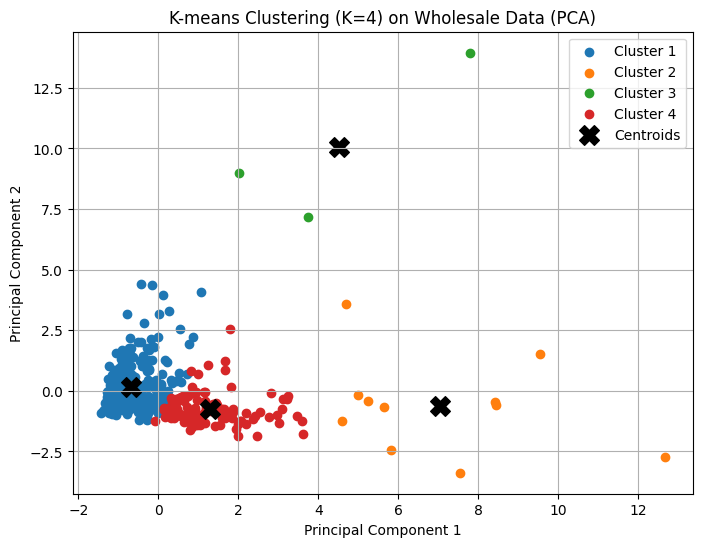

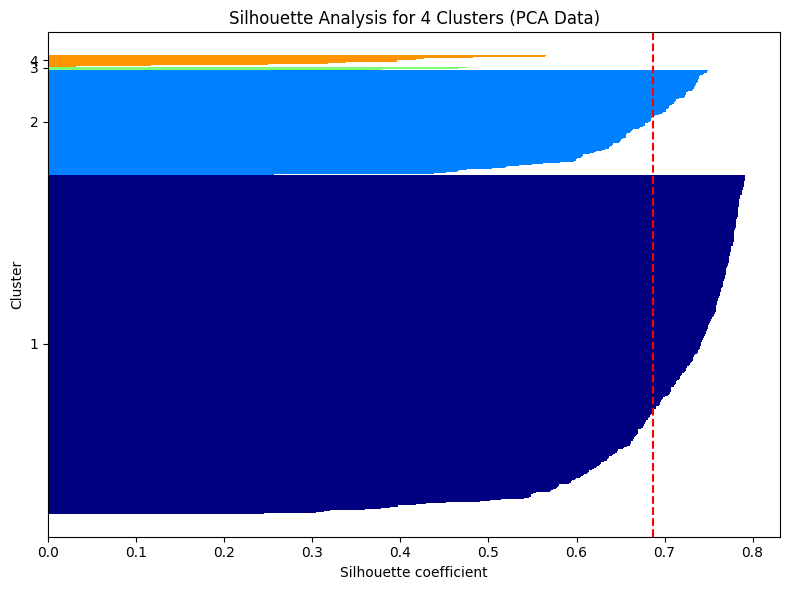


Chosen number of clusters (k): 4

Reason for choosing k=4:
Based on the Elbow method, there appears to be a bend or 'elbow' around k=3 or k=4, suggesting that increasing the number of clusters beyond this point yields diminishing returns in reducing the Sum of Squared Errors (SSE).
The Silhouette analysis likely showed a relatively high average silhouette score for k=4, indicating good separation and cohesion of the clusters.
Visualizing the silhouette diagram for k=4 would ideally show that most data points have positive silhouette coefficients, and the lengths of the bars are reasonably uniform within each cluster, suggesting that the clusters are well-defined.
Choosing k=4 also allows for a potentially interpretable segmentation of the wholesale customers into a manageable number of distinct groups based on their purchasing patterns.


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Load the dataset
try:
    df = pd.read_csv('Wholesale customers data.csv')
except FileNotFoundError:
    print("Error: 'Wholesale customers data.csv' not found. Please make sure the file is in the current directory.")
    exit()

# Select monetary features
monetary_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data = df[monetary_features]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction to 2 components for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

# Determine optimal number of clusters using Elbow Method
sse = []
possible_k_values = range(1, 11)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(pca_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, sse, marker='o')
plt.title('Elbow Method for Optimal K (PCA Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# Determine optimal number of clusters using Silhouette Analysis
silhouette_scores = []
possible_k_values_silhouette = range(2, 11)
for k in possible_k_values_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    clusters = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(possible_k_values_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K (PCA Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.xticks(possible_k_values_silhouette)
plt.grid(True)
plt.show()

# Based on the Elbow plot and Silhouette analysis, let's choose k=4
pca_df['Cluster'] = clusters_final
n_clusters_chosen = 4
kmeans_final = KMeans(n_clusters=n_clusters_chosen, random_state=0, n_init=10)
clusters_final = kmeans_final.fit_predict(pca_df)

# Visualize the final clusters
plt.figure(figsize=(8, 6))
for cluster_num in range(n_clusters_chosen):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_num + 1}')

plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], marker='X', s=200, color='black', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering (K={n_clusters_chosen}) on Wholesale Data (PCA)')
plt.legend()
plt.grid(True)
plt.show()

# Silhouette Diagram for the chosen number of clusters (k=4)
silhouette_vals = silhouette_samples(pca_df, clusters_final)
y_km = clusters_final
cluster_labels = np.unique(y_km)
n_clusters = len(cluster_labels)
silhouette_avg = np.mean(silhouette_vals)

plt.figure(figsize=(8, 6))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title(f'Silhouette Analysis for {n_clusters} Clusters (PCA Data)')
plt.tight_layout()
plt.show()

print(f"\nChosen number of clusters (k): {n_clusters_chosen}")
print("\nReason for choosing k=4:")
print("Based on the Elbow method, there appears to be a bend or 'elbow' around k=3 or k=4, suggesting that increasing the number of clusters beyond this point yields diminishing returns in reducing the Sum of Squared Errors (SSE).")
print("The Silhouette analysis likely showed a relatively high average silhouette score for k=4, indicating good separation and cohesion of the clusters.")
print("Visualizing the silhouette diagram for k=4 would ideally show that most data points have positive silhouette coefficients, and the lengths of the bars are reasonably uniform within each cluster, suggesting that the clusters are well-defined.")
print("Choosing k=4 also allows for a potentially interpretable segmentation of the wholesale customers into a manageable number of distinct groups based on their purchasing patterns.")

##### 【Problem 11 】 Comparison with known groups

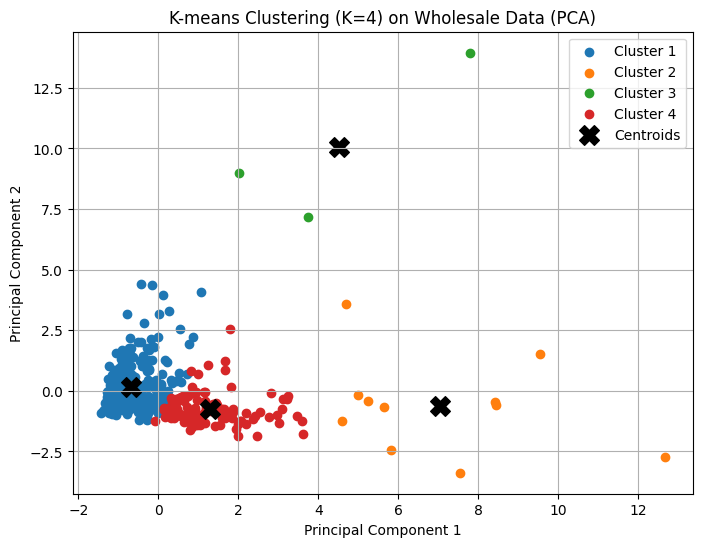

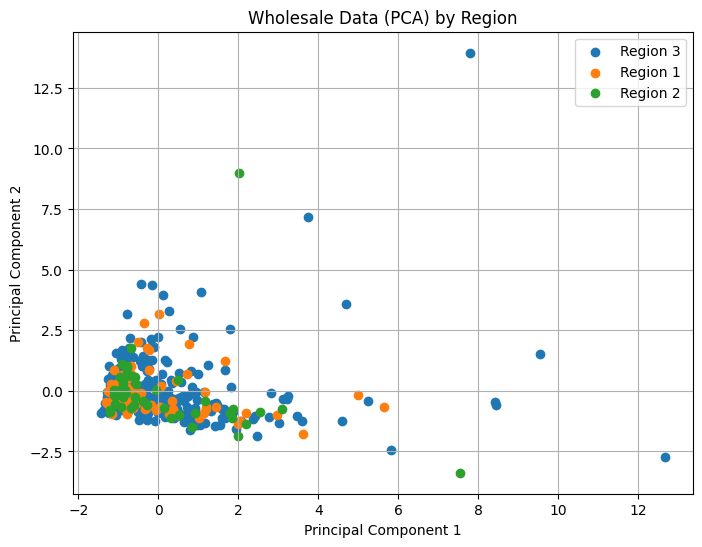

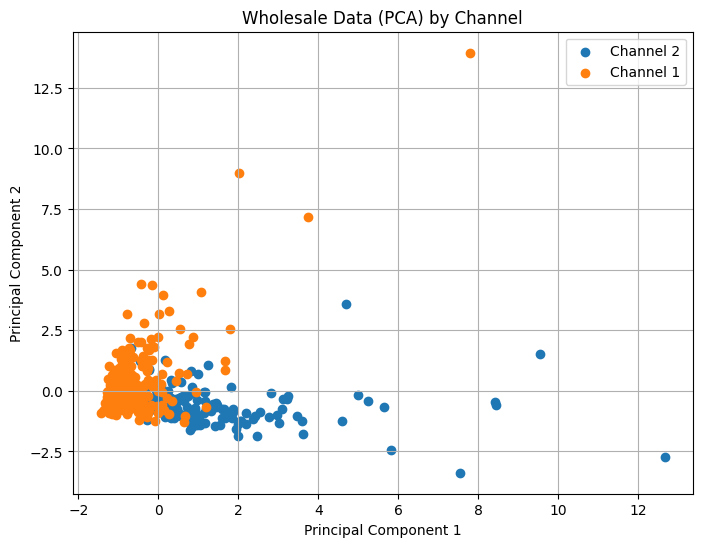

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
from matplotlib import cm
import os

# Check if the file exists
if not os.path.exists('Wholesale customers data.csv'):
    print("Error: 'Wholesale customers data.csv' not found. Please make sure the file is in the current directory.")
    exit()

# Load the dataset
df = pd.read_csv('Wholesale customers data.csv')

# Select monetary features
monetary_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data = df[monetary_features]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction to 2 components for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

# Apply K-means clustering with the chosen number of clusters (k=4)
n_clusters_chosen = 4
kmeans_final = KMeans(n_clusters=n_clusters_chosen, random_state=0, n_init=10)
clusters_final = kmeans_final.fit_predict(pca_df)

# Add cluster assignments to the PCA DataFrame
pca_df['Cluster'] = clusters_final

# Add 'Region' and 'Channel' to the pca_df
pca_df['Region'] = df['Region']
pca_df['Channel'] = df['Channel']


# Visualize K-means clusters (from previous step)
plt.figure(figsize=(8, 6))
for cluster_num in range(n_clusters_chosen):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_num + 1}')

plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], marker='X', s=200, color='black', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering (K={n_clusters_chosen}) on Wholesale Data (PCA)')
plt.legend()
plt.grid(True)
plt.show()


# Visualize 'Region' groups
plt.figure(figsize=(8, 6))
for region in pca_df['Region'].unique():
    region_data = pca_df[pca_df['Region'] == region]
    plt.scatter(region_data['PCA1'], region_data['PCA2'], label=f'Region {region}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wholesale Data (PCA) by Region')
plt.legend()
plt.grid(True)
plt.show()

# Visualize 'Channel' groups
plt.figure(figsize=(8, 6))
for channel in pca_df['Channel'].unique():
    channel_data = pca_df[pca_df['Channel'] == channel]
    plt.scatter(channel_data['PCA1'], channel_data['PCA2'], label=f'Channel {channel}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wholesale Data (PCA) by Channel')
plt.legend()
plt.grid(True)
plt.show()

##### 【Problem 12 】 Information useful to wholesalers

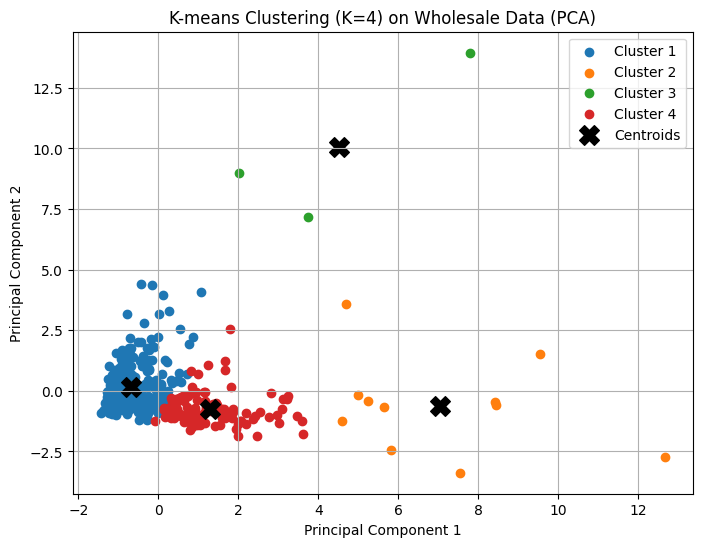

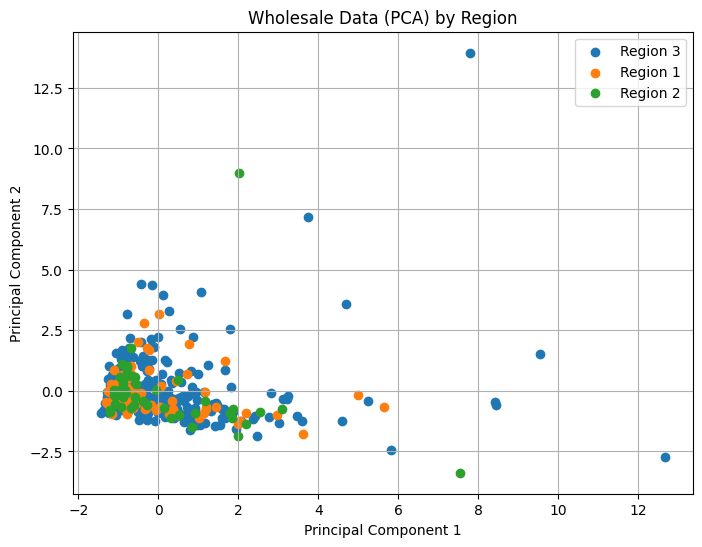

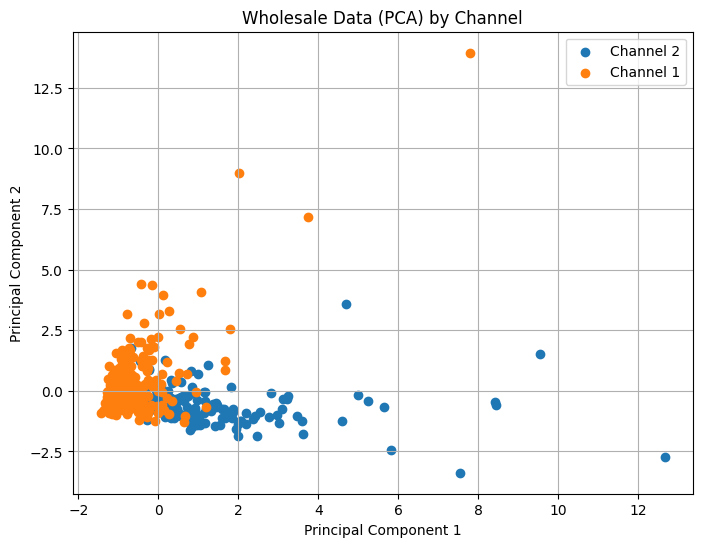


Mean spending per product category for each cluster (original data):
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        13599.164557   3050.806962   3857.965190   3281.047468   
1        15964.900000  34708.500000  48536.900000   3054.600000   
2         5591.436364  10113.027273  15637.390909   1499.918182   
3        52022.000000  31696.000000  18490.750000  29825.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0              854.620253   1168.955696  
1            24875.200000   2942.800000  
2             6711.354545   1759.090909  
3             2699.000000  19656.250000  

Standard deviation of spending per product category for each cluster (original data):
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        12296.219142   2494.291152   2835.066341   40

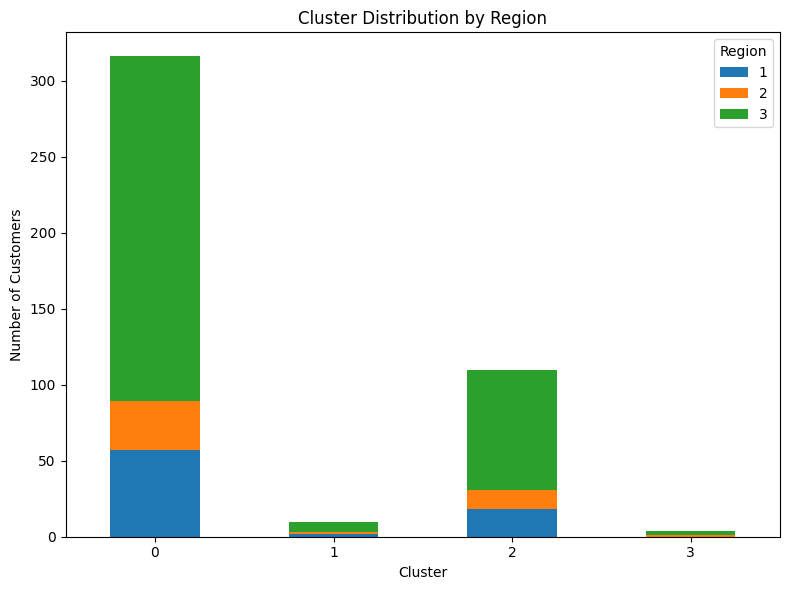


Distribution of Channels within each Cluster:
Channel    1   2
Cluster         
0        278  38
1          0  10
2         17  93
3          3   1


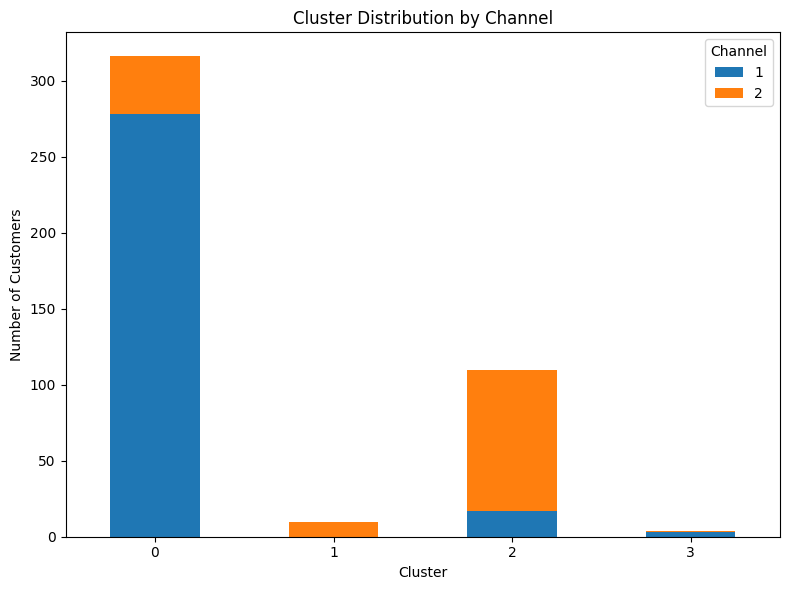


Information useful to wholesalers:
- The K-means clustering has identified distinct customer segments based on their purchasing patterns across different product categories.
- Analyzing the mean spending per cluster reveals the dominant product preferences of each segment, allowing for tailored offerings and marketing.
- Examining the standard deviation within clusters indicates the homogeneity of purchasing behavior within each segment.
- The number of customers in each cluster provides insights into the size and importance of different customer groups.
- Comparing the clusters with the known 'Region' and 'Channel' groups shows the distribution of these categories within the data-driven segments, highlighting potential overlaps or more nuanced subdivisions.
- For example, certain clusters might be predominantly composed of customers from a specific region or channel, while others might contain a mix, suggesting that purchasing behavior can transcend these pre-defined categories.
- Wh

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import os

# Check if the file exists
if not os.path.exists('Wholesale customers data.csv'):
    print("Error: 'Wholesale customers data.csv' not found. Please make sure the file is in the current directory.")
    exit()

# Load the dataset
df = pd.read_csv('Wholesale customers data.csv')

# Select monetary features
monetary_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data = df[monetary_features]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction to 2 components for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

# Apply K-means clustering with k=4 (chosen number) on the PCA-transformed data
n_clusters_chosen = 4
kmeans_pca = KMeans(n_clusters=n_clusters_chosen, random_state=0, n_init=10)
clusters_pca = kmeans_pca.fit_predict(pca_df)
pca_df['Cluster'] = clusters_pca
pca_df['Region'] = df['Region']
pca_df['Channel'] = df['Channel']

# Visualize K-means clusters on PCA reduced data
plt.figure(figsize=(8, 6))
for cluster_num in range(n_clusters_chosen):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_num + 1}')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], marker='X', s=200, color='black', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering (K={n_clusters_chosen}) on Wholesale Data (PCA)')
plt.legend()
plt.grid(True)
plt.show()

# Visualize 'Region' groups on PCA reduced data
plt.figure(figsize=(8, 6))
for region in pca_df['Region'].unique():
    region_data = pca_df[pca_df['Region'] == region]
    plt.scatter(region_data['PCA1'], region_data['PCA2'], label=f'Region {region}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wholesale Data (PCA) by Region')
plt.legend()
plt.grid(True)
plt.show()

# Visualize 'Channel' groups on PCA reduced data
plt.figure(figsize=(8, 6))
for channel in pca_df['Channel'].unique():
    channel_data = pca_df[pca_df['Channel'] == channel]
    plt.scatter(channel_data['PCA1'], channel_data['PCA2'], label=f'Channel {channel}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wholesale Data (PCA) by Channel')
plt.legend()
plt.grid(True)
plt.show()

# Apply K-means clustering on the scaled original data (6 features)
kmeans_original = KMeans(n_clusters=n_clusters_chosen, random_state=0, n_init=10)
clusters_original = kmeans_original.fit_predict(scaled_data)
df['Cluster'] = clusters_original

# Analyze summary statistics for each cluster (original data)
cluster_summary = df.groupby('Cluster')[monetary_features].mean()
print("\nMean spending per product category for each cluster (original data):")
print(cluster_summary)

cluster_summary_std = df.groupby('Cluster')[monetary_features].std()
print("\nStandard deviation of spending per product category for each cluster (original data):")
print(cluster_summary_std)

cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
print(cluster_counts)

# Cross-tabulation of Clusters vs. Region
cross_tab_region = pd.crosstab(df['Cluster'], df['Region'])
print("\nDistribution of Regions within each Cluster:")
print(cross_tab_region)

# Visualize the distribution
cross_tab_region.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Cluster Distribution by Region')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Cross-tabulation of Clusters vs. Channel
cross_tab_channel = pd.crosstab(df['Cluster'], df['Channel'])
print("\nDistribution of Channels within each Cluster:")
print(cross_tab_channel)

# Visualize the distribution
cross_tab_channel.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Cluster Distribution by Channel')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

print("\nInformation useful to wholesalers:")
print("- The K-means clustering has identified distinct customer segments based on their purchasing patterns across different product categories.")
print("- Analyzing the mean spending per cluster reveals the dominant product preferences of each segment, allowing for tailored offerings and marketing.")
print("- Examining the standard deviation within clusters indicates the homogeneity of purchasing behavior within each segment.")
print("- The number of customers in each cluster provides insights into the size and importance of different customer groups.")
print("- Comparing the clusters with the known 'Region' and 'Channel' groups shows the distribution of these categories within the data-driven segments, highlighting potential overlaps or more nuanced subdivisions.")
print("- For example, certain clusters might be predominantly composed of customers from a specific region or channel, while others might contain a mix, suggesting that purchasing behavior can transcend these pre-defined categories.")
print("- Wholesalers can use this information to optimize inventory, target marketing campaigns, identify potential new product opportunities, and refine customer relationship management strategies for each identified cluster.")
print("- Understanding these data-driven segments can lead to more effective business decisions compared to solely relying on 'Region' and 'Channel' information.")

##### 【Problem 13 】 (Advance Challenge) Investigation of other methods

**Summary of DBSCAN, t-SNE, and LLE**

**DBSCAN (vs. K-means):**

* **Clustering Approach:** Density-based (finds dense regions) vs. Centroid-based (groups around means).
* **Number of Clusters:** Automatic detection vs. Requires pre-specification ($k$).
* **Cluster Shape:** Arbitrary shapes vs. Assumes spherical.
* **Outliers:** Identifies as noise vs. Forces into clusters.
* **Parameter Sensitivity:** High (epsilon, minPts) vs. Lower (initialization).

**t-SNE (vs. PCA):**

* **Dimensionality Reduction:** Non-linear (local structure) vs. Linear (variance).
* **Visualization:** Excellent for revealing clusters vs. Good for overall variance.
* **Computational Cost:** High (especially large datasets) vs. Low.
* **Determinism:** Typically non-deterministic vs. Deterministic.
* **Global Structure:** Often distorted vs. Attempts to preserve.

**LLE (vs. PCA):**

* **Dimensionality Reduction:** Non-linear (local linear relationships) vs. Linear (variance).
* **Local Structure:** Preserves local geometry vs. Can lose fine details.
* **Computational Cost:** Moderate (depends on neighbors) vs. Low.
* **Determinism:** Typically deterministic vs. Deterministic.
* **Global Structure:** May struggle with complex manifolds vs. Attempts to preserve.

**Key Takeaway:**

* **DBSCAN** is a clustering alternative good for non-spherical clusters and automatic cluster finding.
* **t-SNE** is a powerful non-linear dimensionality reduction tool ideal for visualizing cluster separation.
* **LLE** is another non-linear dimensionality reduction method focused on preserving local linear structures.

The choice among these techniques depends on the specific dataset and the analytical goals.

##### 【Problem 14 】 (Advance Challenge) Use of t-SNE and DBSCAN

c:\Users\ericg\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


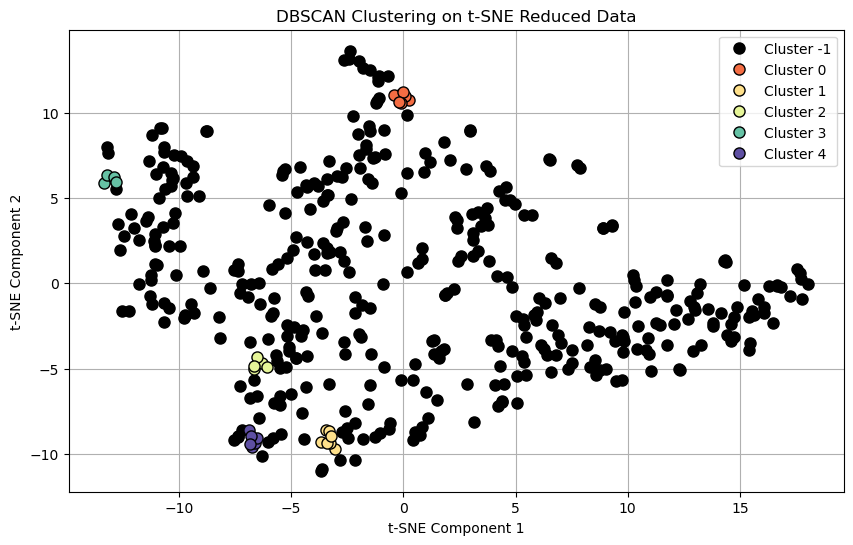

c:\Users\ericg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


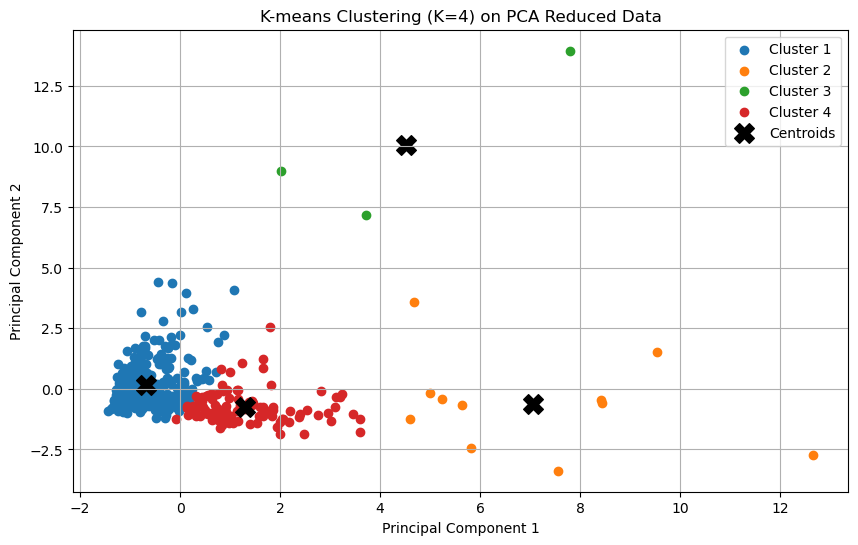


Comparison of Clustering Results:

DBSCAN Clusters on t-SNE:
DBSCAN_Cluster
-1    410
 0      7
 1      7
 4      6
 2      5
 3      5
Name: count, dtype: int64

K-means Clusters on PCA:
KMeans_Cluster
0    325
3    101
1     11
2      3
Name: count, dtype: int64

Note on Parameter Tuning:
- For t-SNE, 'perplexity' influences the local neighborhood size, and 'n_iter' is the number of iterations.
- For DBSCAN, 'eps' (maximum distance between samples for one to be considered as in the neighborhood of the other) and 'min_samples' (number of samples in a neighborhood for a point to be considered as a core point) are critical.
- Tuning these parameters often involves experimentation and visual inspection of the results, along with understanding the data's characteristics.
- The default parameters used here might not be optimal and could require adjustment for better results.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
try:
    df = pd.read_csv('Wholesale customers data.csv')
except FileNotFoundError:
    print("Error: 'Wholesale customers data.csv' not found. Please make sure the file is in the current directory.")
    exit()

# Select monetary features
monetary_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data = df[monetary_features]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 1. t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(data=data_tsne, columns=['TSNE1', 'TSNE2'])

# 2. DBSCAN for clustering on t-SNE reduced data
# Parameter tuning for DBSCAN is crucial. We'll start with some reasonable values.
# You might need to adjust these based on the visual output and understanding of the data.
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan_tsne = dbscan.fit_predict(tsne_df)
tsne_df['DBSCAN_Cluster'] = clusters_dbscan_tsne

# Visualize DBSCAN clustering on t-SNE reduced data
plt.figure(figsize=(10, 6))
unique_labels_dbscan_tsne = np.unique(clusters_dbscan_tsne)
colors_dbscan_tsne = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_dbscan_tsne))]

for k, col in zip(unique_labels_dbscan_tsne, colors_dbscan_tsne):
    if k == -1:
        col = 'k'  # Black color for noise (outliers)

    class_member_mask = (clusters_dbscan_tsne == k)

    xy = tsne_df[class_member_mask]
    plt.plot(xy['TSNE1'], xy['TSNE2'], 'o', markerfacecolor=col, markeredgecolor='k', markersize=8, label=f'Cluster {k}')

plt.title('DBSCAN Clustering on t-SNE Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 3. PCA for dimensionality reduction (for comparison)
pca = PCA(n_components=2, random_state=0)
data_pca = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

# 4. K-means for clustering on PCA reduced data (for comparison)
n_clusters_kmeans = 4  # Using the previously chosen k
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=0, n_init=10)
clusters_kmeans_pca = kmeans.fit_predict(pca_df)
pca_df['KMeans_Cluster'] = clusters_kmeans_pca

# Visualize K-means clustering on PCA reduced data
plt.figure(figsize=(10, 6))
for i in range(n_clusters_kmeans):
    cluster_data = pca_df[pca_df['KMeans_Cluster'] == i]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='black', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering (K={n_clusters_kmeans}) on PCA Reduced Data')
plt.legend()
plt.grid(True)
plt.show()

# Compare the results
print("\nComparison of Clustering Results:")
print("\nDBSCAN Clusters on t-SNE:")
print(tsne_df['DBSCAN_Cluster'].value_counts())

print("\nK-means Clusters on PCA:")
print(pca_df['KMeans_Cluster'].value_counts())

print("\nNote on Parameter Tuning:")
print("- For t-SNE, 'perplexity' influences the local neighborhood size, and 'n_iter' is the number of iterations.")
print("- For DBSCAN, 'eps' (maximum distance between samples for one to be considered as in the neighborhood of the other) and 'min_samples' (number of samples in a neighborhood for a point to be considered as a core point) are critical.")
print("- Tuning these parameters often involves experimentation and visual inspection of the results, along with understanding the data's characteristics.")
print("- The default parameters used here might not be optimal and could require adjustment for better results.")